In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ex 10
Given is the likelihood function for a measured value 𝑥 at a given parameter 𝑎
𝐿(𝑋;𝑎)=1 1 mit 𝑎>0. (1) 𝜋 1+(𝑥−𝑎)2

## a)
Using the Neyman construction, determine the central frequentist 90 % confidence interval for 𝑎 when a value 𝑥 = 10 was measured.

Likelihood funktion integerieren:

$\int L(x,a) = \frac{1}{\pi}\arctan(x-a)$

Symmetrisches Intervall bestimmen. Untere Grenze, indem integrieren bis $x_{unten}$, wo integral 0,05 ist:

$\int_{-\infty}^{x_{unten}} L(x,a) = 0.05$

$\Leftrightarrow \frac{1}{\pi}\arctan(x-a) |_{-\infty}^{_{unten}} = 0.05 $

$\Leftrightarrow \lim \limits_{u \to -\infty}\frac{1}{\pi}(\arctan(x_{unten}-a) - \arctan(u-a)) = 0.05$

$\Leftrightarrow \frac{1}{\pi}(\arctan(x_{unten}-a) - \frac{-\pi}{2}) = 0.05$

$\Leftrightarrow \arctan(x_{unten}-a) = 0.05 \pi - \frac{\pi}{2}$

$\Leftrightarrow x_{unten} = \tan(\frac{-9}{20}\pi)+a$


$\Rightarrow x_{unten} \approx -6.31 + a$

Obere Grenze:

$\Rightarrow \frac{1}{\pi}\arctan(x-a) |_{x_{oben}}^{\infty} = 0.05 $

$\Leftrightarrow x_{oben} = \tan(\frac{9}{20}) + a$

$\Rightarrow x_{oben} \approx 6.31 + a$

In [2]:
x = np.tan(9/20 * np.pi)
x

6.313751514675041

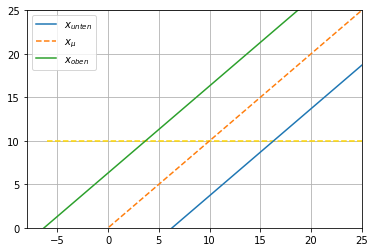

In [8]:
def L(a,x=10):
    return 1/np.pi * 1/(1+(x-a)**2)

a = np.linspace(-10,25,1000)

fig, ax = plt.subplots(1,1)
ax.plot(a,-6.31+a, label = "$x_{unten}$")
ax.plot(a,a, ls = "dashed", label = "$x_{\mu}$")
ax.plot(a,6.31+a , label = "$x_{oben}$")
ax.set_xlim(-8,25)
ax.set_ylim(0,25)
plt.grid()
plt.legend()

ax.hlines(10, -6,25, ls = "dashed", color = "gold") #zu .hlines korrigiert

## b) Reiner Müll 

In [4]:
a_max = 40 # völlig absurde Annahme, da man ne uniform-distribution sonst nicht angeben kann
x = 10

def p(a, x, a_max):
    return 1/((1 + (x-a)**2)*(np.arctan(x)-np.arctan(x-a_max)))

def a_u(x, a_max):
    return x - np.tan(0.05*(np.arctan(x)-np.arctan(x-a_max))+np.arctan(x))

def a_o(x, a_max):
    return x - np.tan(0.05*(np.arctan(x-a_max)-np.arctan(x)) + np.arctan(x-a_max))

10.073689331407861
3.471409072590541


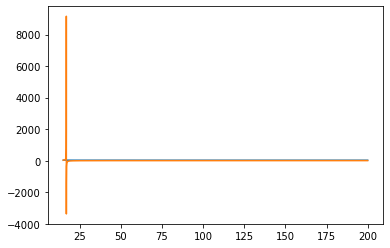

In [5]:
a_m = np.linspace(15, 200, 10000)

plt.plot(a_m, a_u(10, a_m))
plt.plot(a_m, a_o(10, a_m))

print(a_o(10, 10))
print(a_o(10, 10000))